<a href="https://colab.research.google.com/github/jorgelum/EQ/blob/main/mecanismo_de_rea%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

U.C.: Reatores 2

Coordenadora: Profª. Drª. Sania Maria de Lima

Autor: Jorge Luiz Mendes

## Objetivo
Determinar a Lei de Velocidade para reação limitada de tolueno e hidrgênio gasoso por reação irreversível na superfície com análise de dados de um reator diferencial.


\begin{equation}
    C_6H_5CH_3 + H_2 ⇒ C_6H_6 + CH_4
\end{equation}

## Bibliotecas

In [ ]:
import pandas as pd #tratatamento de dados
import numpy as np # Algebra
from scipy.optimize import minimize # otimização
import matplotlib.pyplot as plt # Gráficos
import seaborn as sns # Gráficos

## Dados
Fonte: FOGLER, H.S. Elementos de Engenharia das Reações Químicas. 3ª Edição, Editora: LTC, 2002.

In [ ]:
dados = {"velocidade_experimental":[71.0,71.3,41.6,19.7,42.0,17.1,71.8,142.0,284.0,47.0,71.3,117.0,127.0,131.0,133.0,41.8],
         "Pt":[1,1,1,1,1,1,1,1,1,0.5,1,5,10,15,20,1],
         "Ph2":[1,1,1,1,1,1,1,2,4,1,1,1,1,1,1,1],
         "Pm":[1,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1],
         "Pb":[0,0,1,4,1,5,0,0,0,0,0,0,0,0,0,1]
         }
df = pd.DataFrame(data = dados)
display(df)

,velocidade_experimental,Pt,Ph2,Pm,Pb
0,71.0,1.0,1,1,0
1,71.3,1.0,1,4,0
2,41.6,1.0,1,0,1
3,19.7,1.0,1,0,4
4,42.0,1.0,1,1,1
5,17.1,1.0,1,0,5
6,71.8,1.0,1,0,0
7,142.0,1.0,2,0,0
8,284.0,1.0,4,0,0
9,47.0,0.5,1,0,0


## Análise dos dados
Essa etapa serve para desenvolver o modelo de velocidade de reação

**Dependência em relação ao produto metano**

In [ ]:
df1 = df[(df['Pt']==1) & (df['Ph2']==1) & (df['Pb']==0) & (df['Pm']!=0)]
df1

,velocidade_experimental,Pt,Ph2,Pm,Pb
0,71.0,1.0,1,1,0
1,71.3,1.0,1,4,0


O metano tem pouca influência na velocidade de reação indicando que ele se forma diretamente na fase gasosa.

**Dependência em relação ao produto benzeno**

In [ ]:
df2 = df.iloc[2:6,:]
df2

,velocidade_experimental,Pt,Ph2,Pm,Pb
2,41.6,1.0,1,0,1
3,19.7,1.0,1,0,4
4,42.0,1.0,1,1,1
5,17.1,1.0,1,0,5


Esses dados indicam que o benzeno se forma adsorvido.

**Dependência em relação ao reagente tolueno**

In [ ]:
df3 =df[(df['velocidade_experimental']!=71.8)& (df['Ph2']==1) & (df['Pb']==0) & (df['Pm']==0)]
df3

,velocidade_experimental,Pt,Ph2,Pm,Pb
9,47.0,0.5,1,0,0
10,71.3,1.0,1,0,0
11,117.0,5.0,1,0,0
12,127.0,10.0,1,0,0
13,131.0,15.0,1,0,0
14,133.0,20.0,1,0,0


O tolueno influencia na taxa de velocidade de reação de forma proporcional idicando que o tolueno adsorve e reage na superfície do catalisador.

**Dependência em relação ao reagente H<sub>2**</sub>

In [ ]:
df4 = df.iloc[6:9,:]
df4

,velocidade_experimental,Pt,Ph2,Pm,Pb
6,71.8,1.0,1,0,0
7,142.0,1.0,2,0,0
8,284.0,1.0,4,0,0


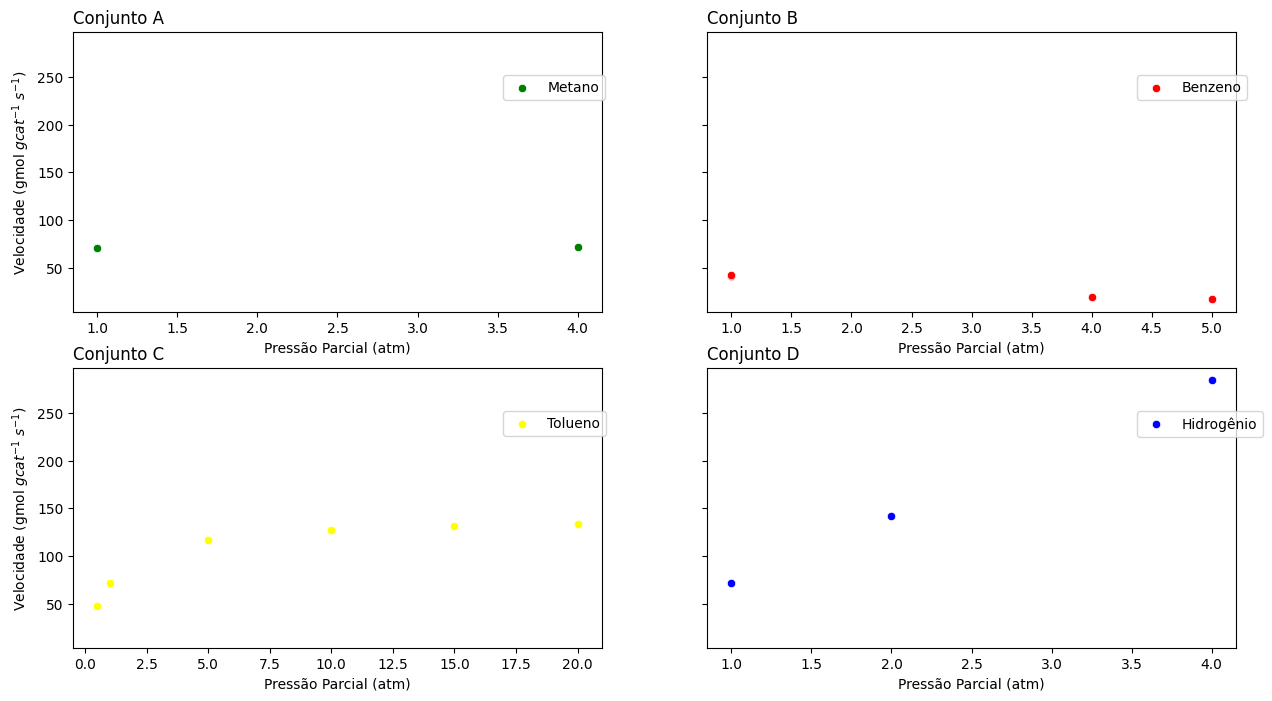

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(15, 8), sharey=True)
#plt.rc('text', usetex=True)
sns.scatterplot(ax = ax[0,0],data =df1, x= 'Pm', y ='velocidade_experimental',color = 'green',label = 'Metano')
ax[0,0].set_title("Conjunto A",loc = 'left')
ax[0,0].legend(loc='center left', bbox_to_anchor=(0.8, 0.8))
ax[0,0].set_xlabel('Pressão Parcial (atm)')
ax[0,0].set_ylabel('Velocidade (gmol $gcat^{-1}$ $s^{-1}$)')

sns.scatterplot(ax =ax[0,1]  ,data =df2, x = 'Pb', y ='velocidade_experimental',color = 'red',label = 'Benzeno')
ax[0,1].set_title("Conjunto B",loc = 'left')
ax[0,1].legend(loc='center left', bbox_to_anchor=(0.8, 0.8))
ax[0,1].set_xlabel('Pressão Parcial (atm)')
ax[0,1].set_ylabel('Velocidade (gmol $gcat^{-1}$ $s^{-1}$)')

sns.scatterplot(ax = ax[1,0], data =df3, x= 'Pt', y ='velocidade_experimental',color = 'yellow',label = 'Tolueno')
ax[1,0].set_title("Conjunto C",loc = 'left')
ax[1,0].legend(loc='center left', bbox_to_anchor=(0.8, 0.8))
ax[1,0].set_xlabel('Pressão Parcial (atm)')
ax[1,0].set_ylabel('Velocidade (gmol $gcat^{-1}$ $s^{-1}$)')

sns.scatterplot(ax = ax[1,1],data =df4, x= 'Ph2', y ='velocidade_experimental',color = 'blue',label = 'Hidrogênio')
ax[1,1].set_title("Conjunto D",loc = 'left')
ax[1,1].legend(loc='center left', bbox_to_anchor=(0.8, 0.8))
ax[1,1].set_xlabel('Pressão Parcial (atm)')
ax[1,1].set_ylabel('Velocidade (gmol $gcat^{-1}$ $s^{-1}$)')
plt.show()

Com os dados podemos determina a lei de velocidade

\begin{equation}
    - r^{'}_{T} \ = \frac{k\ P_T P_{H_2}}{(1 +K_{T}P_T+ K_{B}P_B)}
\end{equation}

## Determinação dos parâmetros cinéticos

In [ ]:
def velocidade(k,dados):
  Pt = dados['Pt'].values
  Ph2 = dados['Ph2'].values
  Pb = dados['Pb'].values
  A = k[0]*Pt*Ph2
  B = 1 + k[1]*Pt + k[2]*Pb
  return A/B


def obj(k,dados):
  rtexp = dados['velocidade_experimental'].values
  res = rtexp - velocidade(k,dados)
  return  sum(res**2)


y = minimize(fun=obj,x0=[1,1,1],args=(df,),bounds=((0,None),(0,None),(0,None))).x
y[0] =y[0]*10**(-10)
print(f'k = {y[0]:.2e}, KT = {round(y[1],3)} atm^-1, KB = {round(y[2],2)} atm^-1')

k = 1.45e-08, KT = 1.038 atm^-1, KB = 1.39 atm^-1
